In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [26]:
df = pd.read_csv("Salary_dataset.csv") 

In [27]:
print(df.head())

   Sr.No  YearsExperience  Salary
0      0              1.2   39344
1      1              1.4   46206
2      2              1.6   37732
3      3              2.1   43526
4      4              2.3   39892


In [28]:
df.drop(columns=["Sr.No"], inplace=True)

In [29]:
print(df.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


In [30]:
X = df[['YearsExperience']]
y = df['Salary']

In [31]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred = model.predict(X_test)

In [34]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 6286.45
Mean Squared Error (MSE): 49830096.86
R² Score: 0.90


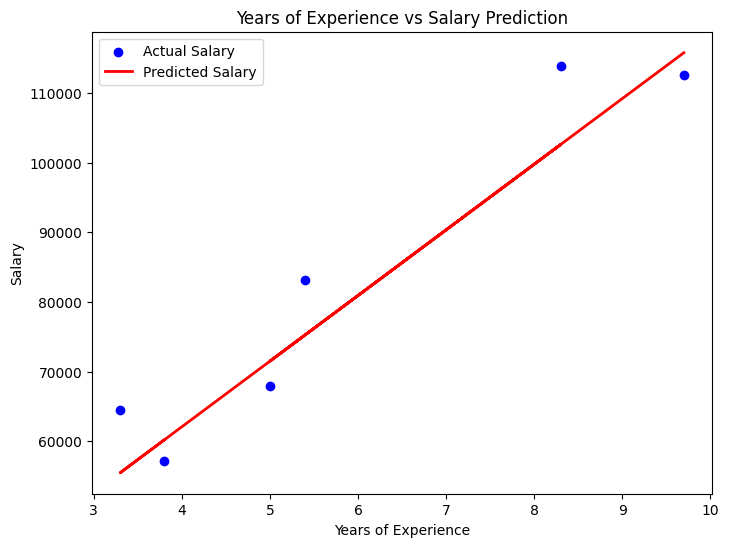

In [36]:
# Visualize Regression Model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="Actual Salary")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary Prediction")
plt.legend()
plt.show()

   Sr.No  YearsExperience  Salary
0      0              1.2   39344
1      1              1.4   46206
2      2              1.6   37732
3      3              2.1   43526
4      4              2.3   39892
YearsExperience    0
Salary             0
dtype: int64
Mean Absolute Error (MAE): 6286.45
Mean Squared Error (MSE): 49830096.86
R² Score: 0.90


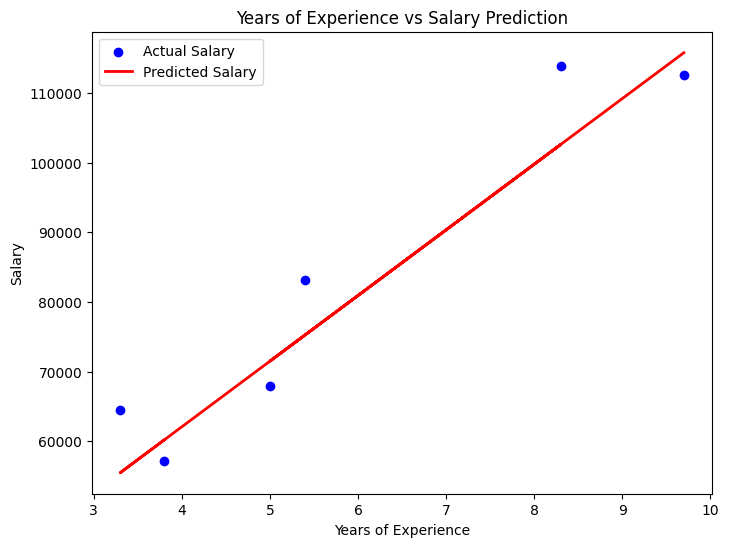

In [37]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv("Salary_dataset.csv")  # Ensure correct path

# Display the first few rows
print(df.head())

# Drop unnecessary column (Sr.No)
df.drop(columns=["Sr.No"], inplace=True)

# Check for missing values
print(df.isnull().sum())

# Define features (X) and target variable (y)
X = df[['YearsExperience']]
y = df['Salary']

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the salaries
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualize Regression Model
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label="Actual Salary")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Years of Experience vs Salary Prediction")
plt.legend()
plt.show()
